In [1]:
import pandas as pd
data=pd.read_csv("iris.csv")
len(data)
data[:5]
print(data['Species'].unique())
import seaborn as sns
sns.pairplot(data, hue='Species')

['Setosa' 'Versicolor' 'Virginica']


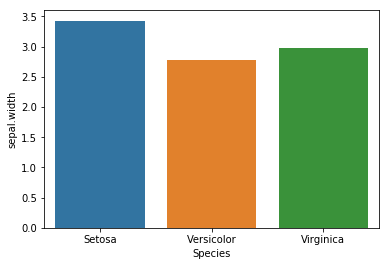

In [2]:
sns.barplot(data['Species'], data['sepal.width'],ci=None)

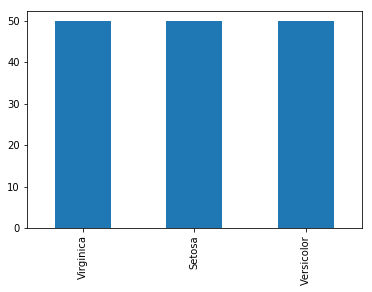

In [3]:
import matplotlib.pyplot as plt
data['Species'].value_counts().plot(kind='bar')

In [4]:
data['Species']=data['Species'].replace(['Setosa','Versicolor','Virginica'],[0,1,2])


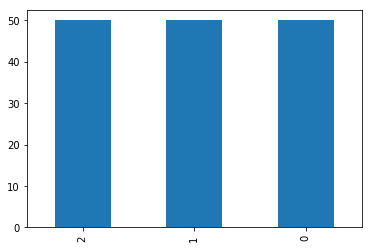

In [5]:
data['Species'].value_counts().plot(kind='bar')

In [6]:
#data.info()
datax=data[['sepal.length', 'sepal.width','petal.length','petal.width']].values
datay=data['Species'].values
print(datax[:5])
print(data[:5])

#datay=

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
   sepal.length  sepal.width  petal.length  petal.width  Species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
(xtrain,xtest, ytrain,ytest)=train_test_split(datax,datay, train_size=0.8, random_state=1)

C:\Users\Kyujin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [9]:
from keras.utils import np_utils
ytrain=np_utils.to_categorical(ytrain)
ytest=np_utils.to_categorical(ytest)


Using TensorFlow backend.


In [10]:
ytrain
ytest

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [11]:
#소프트맥스 회귀
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [12]:
model=Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
sgd=optimizers.SGD(lr=0.01) #학습률
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(xtrain,ytrain, batch_size=1, epochs=200, validation_data=(xtest, ytest))

W0814 10:18:21.053448   244 deprecation_wrapper.py:119] From C:\Users\Kyujin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0814 10:18:21.098328   244 deprecation_wrapper.py:119] From C:\Users\Kyujin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0814 10:18:21.110300   244 deprecation_wrapper.py:119] From C:\Users\Kyujin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0814 10:18:21.169143   244 deprecation_wrapper.py:119] From C:\Users\Kyujin\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0814 10:18:21.219004   244 deprecation_wrapper.py:119] From C:\Users\Kyujin

Train on 120 samples, validate on 30 samples
Epoch 1/200
120/120 [==============================] - 0s 4ms/step - loss: 2.2278 - acc: 0.3667 - val_loss: 2.2478 - val_acc: 0.2000
Epoch 2/200
120/120 [==============================] - 0s 1ms/step - loss: 1.7288 - acc: 0.3333 - val_loss: 1.7766 - val_acc: 0.1667
Epoch 3/200
120/120 [==============================] - 0s 1ms/step - loss: 1.4101 - acc: 0.3333 - val_loss: 1.3977 - val_acc: 0.1667
Epoch 4/200
120/120 [==============================] - 0s 2ms/step - loss: 1.1724 - acc: 0.3250 - val_loss: 1.1998 - val_acc: 0.1667
Epoch 5/200
120/120 [==============================] - 0s 1ms/step - loss: 1.0378 - acc: 0.3250 - val_loss: 1.0809 - val_acc: 0.1667
Epoch 6/200
120/120 [==============================] - 0s 1ms/step - loss: 0.9620 - acc: 0.3667 - val_loss: 1.0007 - val_acc: 0.4000
Epoch 7/200
120/120 [==============================] - 0s 2ms/step - loss: 0.9012 - acc: 0.5333 - val_loss: 0.9383 - val_acc: 0.5333
Epoch 8/200
120/120 [===

120/120 [==============================] - 0s 1ms/step - loss: 0.3503 - acc: 0.9083 - val_loss: 0.4116 - val_acc: 0.7667
Epoch 62/200
120/120 [==============================] - 0s 2ms/step - loss: 0.3491 - acc: 0.9583 - val_loss: 0.4294 - val_acc: 0.7333
Epoch 63/200
120/120 [==============================] - 0s 2ms/step - loss: 0.3464 - acc: 0.8917 - val_loss: 0.4132 - val_acc: 0.7333
Epoch 64/200
120/120 [==============================] - 0s 2ms/step - loss: 0.3424 - acc: 0.9083 - val_loss: 0.3950 - val_acc: 0.8000
Epoch 65/200
120/120 [==============================] - 0s 2ms/step - loss: 0.3395 - acc: 0.9333 - val_loss: 0.4060 - val_acc: 0.7667
Epoch 66/200
120/120 [==============================] - 0s 2ms/step - loss: 0.3363 - acc: 0.9417 - val_loss: 0.4011 - val_acc: 0.7667
Epoch 67/200
120/120 [==============================] - 0s 2ms/step - loss: 0.3341 - acc: 0.9167 - val_loss: 0.3905 - val_acc: 0.8000
Epoch 68/200
120/120 [==============================] - 0s 2ms/step - loss:

120/120 [==============================] - 0s 2ms/step - loss: 0.2291 - acc: 0.9750 - val_loss: 0.3036 - val_acc: 0.9000
Epoch 123/200
120/120 [==============================] - 0s 2ms/step - loss: 0.2276 - acc: 0.9750 - val_loss: 0.2923 - val_acc: 0.9333
Epoch 124/200
120/120 [==============================] - 0s 2ms/step - loss: 0.2244 - acc: 0.9750 - val_loss: 0.2760 - val_acc: 0.9333
Epoch 125/200
120/120 [==============================] - 0s 2ms/step - loss: 0.2249 - acc: 0.9750 - val_loss: 0.2760 - val_acc: 0.9333
Epoch 126/200
120/120 [==============================] - 0s 2ms/step - loss: 0.2255 - acc: 0.9750 - val_loss: 0.2832 - val_acc: 0.9333
Epoch 127/200
120/120 [==============================] - 0s 2ms/step - loss: 0.2223 - acc: 0.9750 - val_loss: 0.2745 - val_acc: 0.9333
Epoch 128/200
120/120 [==============================] - 0s 2ms/step - loss: 0.2208 - acc: 0.9833 - val_loss: 0.2879 - val_acc: 0.9333
Epoch 129/200
120/120 [==============================] - 0s 2ms/step 

Epoch 183/200
120/120 [==============================] - 0s 2ms/step - loss: 0.1703 - acc: 0.9833 - val_loss: 0.2193 - val_acc: 0.9667
Epoch 184/200
120/120 [==============================] - 0s 2ms/step - loss: 0.1701 - acc: 0.9750 - val_loss: 0.2260 - val_acc: 0.9333
Epoch 185/200
120/120 [==============================] - 0s 2ms/step - loss: 0.1683 - acc: 0.9750 - val_loss: 0.2234 - val_acc: 0.9333
Epoch 186/200
120/120 [==============================] - 0s 2ms/step - loss: 0.1673 - acc: 0.9750 - val_loss: 0.2179 - val_acc: 0.9667
Epoch 187/200
120/120 [==============================] - 0s 2ms/step - loss: 0.1659 - acc: 0.9750 - val_loss: 0.2123 - val_acc: 0.9667
Epoch 188/200
120/120 [==============================] - 0s 2ms/step - loss: 0.1653 - acc: 0.9833 - val_loss: 0.2165 - val_acc: 0.9667
Epoch 189/200
120/120 [==============================] - 0s 2ms/step - loss: 0.1662 - acc: 0.9833 - val_loss: 0.2113 - val_acc: 0.9667
Epoch 190/200
120/120 [==============================] 

In [ ]:
epochs= range(1, len(history()))

In [14]:
print("테스트 정확도: %.4f" % (model.evaluate(xtest,ytest)[1]))

30/30 [==============================] - 0s 33us/step
테스트 정확도: 0.9667


In [16]:
model=Sequential()
model.add(Dense(8,input_dim=4, activation='relu', init='uniform'))
#x=(1,4), W=(4,8), B=(1,8), y=(1,8)
model.add(Dense(8, activation='relu'))
#x=(1,8), W=(8,8), B=(1,8), y=(1,8)
model.add(Dense(3, activation='softmax'))
#x=(1,8), W=(8,3), B=(1,3), y=(1,3)





C:\Users\Kyujin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, input_dim=4, activation="relu", kernel_initializer="uniform")`
  


In [18]:
model.fit(xtrain, ytrain, batch_size=len(xtrain))
#배치경사하강법:1에폭에 모든 매개변수 업데이트를 한 번 수행

model.fit(xtrain, ytrain, batch_size=16)

model.fit(xtrain, ytrain, batch_size=1)
#SGD(확률적 경사 하강법)

keras.optimizers.SGD(lr=0.01, momentum=0.9)




RuntimeError: You must compile a model before training/testing. Use `model.compile(optimizer, loss)`.

In [22]:
from keras.preprocessing.text import Tokenizer
t=Tokenizer()
fitText="The earth is an awesome place to live"
t.fit_on_texts([fitText])
print(t.word_index)

test="The earth is an great place to live"
t.texts_to_sequences([test])

{'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'to': 7, 'live': 8}


[[1, 2, 3, 4, 6, 7, 8]]

In [24]:
# padding: 길이를 동일하게 맞춰주는 작업
from keras.preprocessing.sequence import pad_sequences
pad_sequences([[10,20,30],[40,50],[60,70,80,90]], maxlen=5, padding='post')

array([[10, 20, 30,  0,  0],
       [40, 50,  0,  0,  0],
       [60, 70, 80, 90,  0]])

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 27        
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


In [27]:
# model.fit(xtrain, ytrain, epochs=10, batch_size=64)
# model.evaluate(xtest, ytest, batch_size=32)

model.predict(xinput, batch_size=32)
#모델 저장
model.save("my_model.h5")
#모델 불러오기
from keras.models import load_model
model=load_model("my_model.h5")

NameError: name 'xinput' is not defined

In [32]:
import tensorflow as tf
xdata=[1,2,3]
ydata=[1,2,3]

x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

w=tf.Variable(tf.random_normal([1]))
b=tf.Variable(tf.random_normal([1]))

hf=w*x+b
cost=tf.reduce_mean((hf-y)**2)

train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)
sess=tf.Session()
sess.run(tf.global_variables_initializer())
feed={x:xdata, y:ydata}

saver=tf.train.Saver()
for i in range(2001):
    sess.run(train, feed_dict=feed)
    if i%20==0:
        print(i, sess.run(cost, feed_dict=feed))
saver.save(sess, 'Model/first')

0 0.15347241
20 0.009408181
40 0.0035546666
60 0.0013430527
80 0.0005074429
100 0.00019172563
120 7.243924e-05
140 2.7368907e-05
160 1.0340785e-05
180 3.906789e-06
200 1.4761517e-06
220 5.5775735e-07
240 2.1073741e-07
260 7.963293e-08
280 3.008144e-08
300 1.1351105e-08
320 4.294241e-09
340 1.6279967e-09
360 6.1381894e-10
380 2.3129232e-10
400 8.6895824e-11
420 3.3008263e-11
440 1.2468841e-11
460 5.02709e-12
480 1.9184654e-12
500 7.8633394e-13
520 2.9487524e-13
540 1.373716e-13
560 4.8553755e-14
580 3.7895614e-14
600 3.7895614e-14
620 3.7895614e-14
640 3.7895614e-14
660 3.7895614e-14
680 3.7895614e-14
700 3.7895614e-14
720 3.7895614e-14
740 3.7895614e-14
760 3.7895614e-14
780 3.7895614e-14
800 3.7895614e-14
820 3.7895614e-14
840 3.7895614e-14
860 3.7895614e-14
880 3.7895614e-14
900 3.7895614e-14
920 3.7895614e-14
940 3.7895614e-14
960 3.7895614e-14
980 3.7895614e-14
1000 3.7895614e-14
1020 3.7895614e-14
1040 3.7895614e-14
1060 3.7895614e-14
1080 3.7895614e-14
1100 3.7895614e-14
1120 3.7

In [33]:
import tensorflow as tf
xdata=[1,2,3]
ydata=[1,2,3]

x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

w=tf.Variable(tf.random_normal([1]))
b=tf.Variable(tf.random_normal([1]))

hf=w*x+b
cost=tf.reduce_mean((hf-y)**2)

train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)
sess=tf.Session()
sess.run(tf.global_variables_initializer())
feed={x:xdata, y:ydata}

saver=tf.train.Saver()
for i in range(2001):
    sess.run(train, feed_dict=feed)
    if i%20==0:
        print(i, sess.run(cost, feed_dict=feed))
        saver.save(sess, 'Model/second', global_step=i)
saver.save(sess, 'Model/first')

0 0.400744
20 0.11020905
40 0.04163995
60 0.015732685
80 0.0059442404


W0814 13:57:06.483328   244 deprecation.py:323] From C:\Users\Kyujin\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py:960: remove_checkpoint (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to delete files with this prefix.


100 0.0022458925
120 0.00084856135
140 0.00032060727
160 0.0001211334
180 4.576778e-05
200 1.7292272e-05
220 6.5331283e-06
240 2.4682588e-06
260 9.326765e-07
280 3.5235237e-07
300 1.3313314e-07
320 5.0301082e-08
340 1.9002854e-08
360 7.1796884e-09
380 2.7085132e-09
400 1.0262559e-09
420 3.8835898e-10
440 1.4690708e-10
460 5.648341e-11
480 2.0923116e-11
500 8.000711e-12
520 3.0932294e-12
540 1.1226575e-12
560 4.92643e-13
580 1.563194e-13
600 6.158037e-14
620 6.158037e-14
640 1.8947807e-14
660 4.7369517e-15
680 0.0
700 0.0
720 0.0
740 0.0
760 0.0
780 0.0
800 0.0
820 0.0
840 0.0
860 0.0
880 0.0
900 0.0
920 0.0
940 0.0
960 0.0
980 0.0
1000 0.0
1020 0.0
1040 0.0
1060 0.0
1080 0.0
1100 0.0
1120 0.0
1140 0.0
1160 0.0
1180 0.0
1200 0.0
1220 0.0
1240 0.0
1260 0.0
1280 0.0
1300 0.0
1320 0.0
1340 0.0
1360 0.0
1380 0.0
1400 0.0
1420 0.0
1440 0.0
1460 0.0
1480 0.0
1500 0.0
1520 0.0
1540 0.0
1560 0.0
1580 0.0
1600 0.0
1620 0.0
1640 0.0
1660 0.0
1680 0.0
1700 0.0
1720 0.0
1740 0.0
1760 0.0
1780 0.0
1

'Model/first'

In [42]:
import tensorflow as tf
xdata=[1,2,3]
ydata=[1,2,3]

x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

w=tf.Variable(tf.random_normal([1]))
b=tf.Variable(tf.random_normal([1]))

hf=w*x+b
cost=tf.reduce_mean((hf-y)**2)

train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)
sess=tf.Session()
# sess.run(tf.global_variables_initializer())
feed={x:xdata, y:ydata}
latest=tf.train.latest_checkpoint('Model')
saver=tf.train.Saver()
print(latest)
saver.restore(sess,latest)
print(sess.run(hf ,))

Model\first


NotFoundError: Restoring from checkpoint failed. This is most likely due to a Variable name or other graph key that is missing from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Key Variable_10 not found in checkpoint
	 [[node save_9/RestoreV2 (defined at <ipython-input-42-e08f585e50ea>:19) ]]

Original stack trace for 'save_9/RestoreV2':
  File "C:\Users\Kyujin\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Kyujin\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\Kyujin\Anaconda3\lib\asyncio\base_events.py", line 539, in run_forever
    self._run_once()
  File "C:\Users\Kyujin\Anaconda3\lib\asyncio\base_events.py", line 1775, in _run_once
    handle._run()
  File "C:\Users\Kyujin\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\tornado\gen.py", line 781, in inner
    self.run()
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\tornado\gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-42-e08f585e50ea>", line 19, in <module>
    saver=tf.train.Saver()
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 825, in __init__
    self.build()
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 837, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 875, in _build
    build_restore=build_restore)
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 508, in _build_internal
    restore_sequentially, reshape)
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 328, in _AddRestoreOps
    restore_sequentially)
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 575, in bulk_restore
    return io_ops.restore_v2(filename_tensor, names, slices, dtypes)
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_io_ops.py", line 1779, in restore_v2
    name=name)
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3616, in create_op
    op_def=op_def)
  File "C:\Users\Kyujin\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


In [49]:
from keras.layers import Input, Dense
from keras.models import Model

inputs=Input(shape=(10,))#입력 10개
h1=Dense(64, activation='relu')(inputs)
h2=Dense(64, activation='relu')(h1)
output=Dense(1, activation='sigmoid')(h2)
model=Model(inputs=inputs, outputs=output)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
